In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
%matplotlib inline
from nltk.corpus import stopwords
import nltk

In [88]:
df = pd.read_csv("data 1_train.csv")

In [89]:
df.head()

,example_id,text,aspect_term,term_location,class
0,2333_1,Obviously one of the most important features o...,human interface,69--84,0
1,1805_1,Good for every day computing and web browsing.,every day computing,9--28,1
2,2782_2,while the keyboard itself is alright[comma] th...,mouse command buttons,115--136,-1
3,1385_0,Again[comma] the same problem[comma] the right...,right speaker,29--42,-1
4,1423_0,My problem was with DELL Customer Service.,DELL Customer Service,20--41,-1


In [90]:
messages = df[' text']

In [91]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
messages = [message.replace("[comma]","") for message in messages]
messages = [message.lower() for message in messages]
messages = [tokenizer.tokenize(message) for message in messages]


In [92]:
messages

[['obviously',
  'one',
  'of',
  'the',
  'most',
  'important',
  'features',
  'of',
  'any',
  'computer',
  'is',
  'the',
  'human',
  'interface'],
 ['good', 'for', 'every', 'day', 'computing', 'and', 'web', 'browsing'],
 ['while',
  'the',
  'keyboard',
  'itself',
  'is',
  'alright',
  'the',
  'plate',
  'around',
  'it',
  'is',
  'cheap',
  'plastic',
  'and',
  'makes',
  'a',
  'hollow',
  'sound',
  'when',
  'using',
  'the',
  'mouse',
  'command',
  'buttons'],
 ['again',
  'the',
  'same',
  'problem',
  'the',
  'right',
  'speaker',
  'did',
  'not',
  'work'],
 ['my', 'problem', 'was', 'with', 'dell', 'customer', 'service'],
 ['is',
  'this',
  'partially',
  'due',
  'to',
  'the',
  'fact',
  'that',
  'it',
  'is',
  'running',
  'windows',
  'vista'],
 ['accordingly',
  'i',
  'have',
  'decided',
  'to',
  'never',
  'purchase',
  'another',
  'hp',
  'product',
  'my',
  'five',
  'year',
  'old',
  'compaq',
  'lasted',
  '5',
  'years',
  'before',
  'the

In [93]:
labels = df[' class']

In [94]:
len(labels)

2203

([<matplotlib.axis.XTick at 0x23e21fd2470>,
 <a list of 3 Text xticklabel objects>)

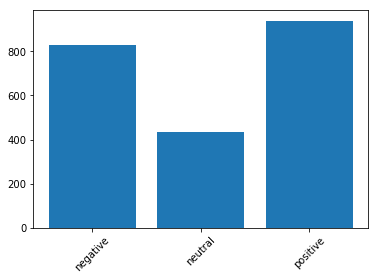

In [95]:
ul = [1,-1,0]
plt.bar(ul,labels.value_counts())
plt.xticks(ul,['positive','negative','neutral'],rotation=45)

In [96]:
messages = [" ".join(message) for message in messages]

In [97]:
messages

['obviously one of the most important features of any computer is the human interface',
 'good for every day computing and web browsing',
 'while the keyboard itself is alright the plate around it is cheap plastic and makes a hollow sound when using the mouse command buttons',
 'again the same problem the right speaker did not work',
 'my problem was with dell customer service',
 'is this partially due to the fact that it is running windows vista',
 'accordingly i have decided to never purchase another hp product my five year old compaq lasted 5 years before the hard drive crashed',
 'i did think it had a camera because that was one of my requirements but forgot to check in the specifications on this one before i purchased',
 'cords coming out the right for power plus cords coming out front for headphones mic plus network connection on left make for a very messy setup with cords going every direction',
 'the most recent being that my safari internet browser is freaking out on me but i 

In [98]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
v = CountVectorizer(analyzer = 'word',ngram_range=(1,1))

X = v.fit_transform(messages)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3)

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import recall_score, f1_score
from sklearn.cross_validation import cross_val_score,cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
lr = LogisticRegression(C=0.000000001,solver='liblinear')
nb = MultinomialNB(fit_prior=False, alpha=0.3)
svc = SVC(kernel = 'linear', max_iter = 1000)
knn = KNeighborsClassifier(n_neighbors=5)
dt = tree.DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=10)
clfs=[lr,nb,knn,dt,rf,svc]
names= ["Logistic Regression","Naive Bayes","Nearest Neighbours","Decision Tree","Random Forest","SVM"]
i=0
for clf in clfs:
    pred = cross_val_predict(clf,X_train,list(y_train),cv=10)
    print("THe Training report for "+str(names[i]))
    print(classification_report(list(y_train),pred))
    print("The accuracy for "+names[i]+" is :"+str(accuracy_score(list(y_train),pred)))
    i+=1
    clf.fit(X_train,y_train)

THe Training report for Logistic Regression
             precision    recall  f1-score   support

         -1       0.50      0.02      0.04       573
          0       0.00      0.00      0.00       306
          1       0.43      1.00      0.60       663

avg / total       0.37      0.44      0.27      1542

The accuracy for Logistic Regression is :0.4351491569390402
THe Training report for Naive Bayes
             precision    recall  f1-score   support

         -1       0.71      0.69      0.70       573
          0       0.48      0.53      0.51       306
          1       0.78      0.76      0.77       663

avg / total       0.70      0.69      0.69      1542

The accuracy for Naive Bayes is :0.6900129701686122
THe Training report for Nearest Neighbours
             precision    recall  f1-score   support

         -1       0.60      0.35      0.44       573
          0       0.54      0.19      0.28       306
          1       0.52      0.87      0.66       663

avg / total    

C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


THe Training report for Decision Tree
             precision    recall  f1-score   support

         -1       0.64      0.68      0.66       573
          0       0.49      0.50      0.49       306
          1       0.73      0.68      0.70       663

avg / total       0.65      0.64      0.65      1542

The accuracy for Decision Tree is :0.6446173800259404
THe Training report for Random Forest
             precision    recall  f1-score   support

         -1       0.66      0.73      0.69       573
          0       0.58      0.39      0.47       306
          1       0.71      0.76      0.74       663

avg / total       0.67      0.68      0.67      1542

The accuracy for Random Forest is :0.6750972762645915


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sk

THe Training report for SVM
             precision    recall  f1-score   support

         -1       0.70      0.71      0.70       573
          0       0.51      0.49      0.50       306
          1       0.74      0.74      0.74       663

avg / total       0.68      0.68      0.68      1542

The accuracy for SVM is :0.6796368352788587


In [107]:
i=0
for clf in clfs:
    pred = clf.predict(X_test)
    print("THe testing report for "+str(names[i]))
    print(classification_report(list(y_test),pred))
    print("The accuracy for "+names[i]+" is :"+str(accuracy_score(list(y_test),pred)))
    i+=1

THe testing report for Logistic Regression
             precision    recall  f1-score   support

         -1       0.50      0.00      0.01       255
          0       0.00      0.00      0.00       130
          1       0.42      1.00      0.59       276

avg / total       0.37      0.42      0.25       661

The accuracy for Logistic Regression is :0.41906202723146746
THe testing report for Naive Bayes
             precision    recall  f1-score   support

         -1       0.73      0.73      0.73       255
          0       0.50      0.52      0.51       130
          1       0.81      0.79      0.80       276

avg / total       0.72      0.71      0.72       661

The accuracy for Naive Bayes is :0.7140695915279879
THe testing report for Nearest Neighbours
             precision    recall  f1-score   support

         -1       0.77      0.43      0.55       255
          0       0.72      0.24      0.36       130
          1       0.55      0.95      0.70       276

avg / total      

C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
